Retail Customer Behavior Analysis using NumPy & Seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42) #To ensure reproducibility — same random data each time.

In [4]:
n = 1000

data = pd.DataFrame({
    "Customer_ID": np.arange(1, n+1),
    "Age": np.random.randint(18, 65, n),
    "Income": np.random.normal(50000, 15000, n),
    "Monthly_Spending": np.random.normal(800, 250, n),
    "Purchase_Count": np.random.poisson(6, n),
    "Discount_Percentage": np.random.randint(5, 40, n),
    "Satisfaction_Score": np.random.uniform(1, 10, n)
})

In [6]:
mean_spending = np.mean(data["Monthly_Spending"])
median_spending = np.median(data["Monthly_Spending"])
std_spending = np.std(data["Monthly_Spending"])
variance_spending = np.var(data["Monthly_Spending"])
min_income = np.min(data["Income"])
max_income = np.max(data["Income"])
percentile_90 = np.percentile(data["Monthly_Spending"], 90)

In [46]:
#Array Operations & Reshaping
income_array = data["Income"].values

reshaped = income_array.reshape(-1, 1)
flattened = reshaped.flatten()
transposed = reshaped.T

In [48]:
#Boolean Indexing & Conditional Filtering
high_spenders = data[data["Monthly_Spending"] > 1200]
young_customers = data[data["Age"] < 25]

condition = np.where(data["Income"] > 60000, "High", "Low")

In [50]:
#Mathematical Transformations
data["Log_Income"] = np.log(data["Income"])
data["Sqrt_Spending"] = np.sqrt(data["Monthly_Spending"])
data["Income_Squared"] = np.power(data["Income"], 2)


In [52]:
#Sorting & Unique Analysis
sorted_income = np.sort(data["Income"])
unique_discounts = np.unique(data["Discount_Percentage"])


In [54]:
#Linear Algebra
matrix = np.array([[1, 2], [3, 4]])

determinant = np.linalg.det(matrix)
inverse = np.linalg.inv(matrix)
eigenvalues, eigenvectors = np.linalg.eig(matrix)


In [56]:
data.head()

,Customer_ID,Age,Income,Monthly_Spending,Purchase_Count,Discount_Percentage,Satisfaction_Score,Log_Income,Sqrt_Spending,Income_Squared
0,1,56,65094.392138,507.520791,3,32,9.506708,11.083594,22.528222,4.237280e+09
1,2,46,41346.621957,81.934447,4,31,6.476542,10.629746,9.051765,1.709543e+09
2,3,32,62535.381681,793.121274,4,6,3.291642,11.043488,28.162409,3.910674e+09
3,4,60,33054.397180,1243.062899,7,37,9.317332,10.405910,35.257097,1.092593e+09
4,5,25,57947.062669,1215.314804,9,20,7.977842,10.967285,34.861365,3.357862e+09


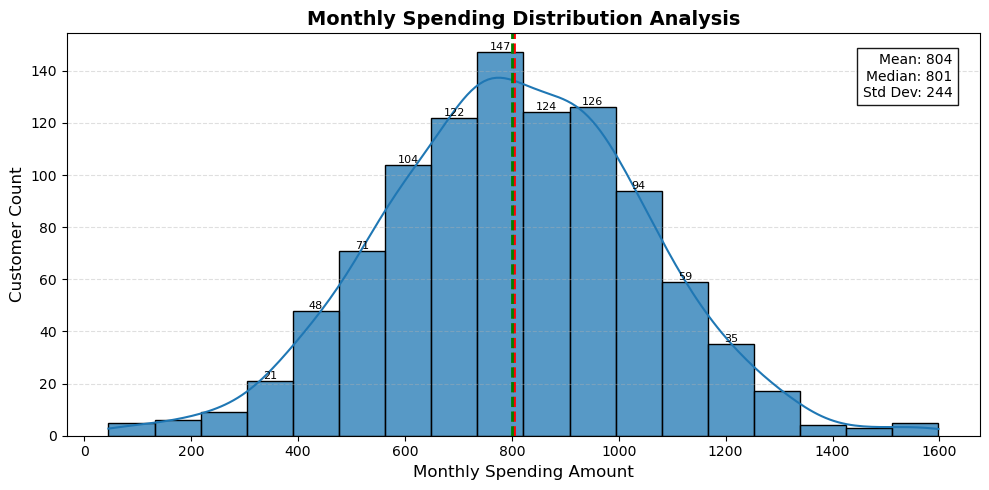

In [82]:
#Distribution Analysis

spending = data["Monthly_Spending"]
mean_val = np.mean(spending)
median_val = np.median(spending)
std_val = np.std(spending)

plt.figure(figsize=(10,5))

ax = sns.histplot(
    spending,
    bins=18,
    kde=True,
    edgecolor="black",
    alpha=0.75
)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2)
plt.axvline(median_val, color='green', linestyle='--', linewidth=2)

# Data Labels
for patch in ax.patches:
    height = patch.get_height()
    if height > 20:   # prevents clutter
        ax.text(
            patch.get_x() + patch.get_width()/2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.text(
    0.97, 0.95,
    f"Mean: {mean_val:.0f}\nMedian: {median_val:.0f}\nStd Dev: {std_val:.0f}",
    transform=plt.gca().transAxes,
    ha='right',
    va='top',
    bbox=dict(facecolor='white', edgecolor='black', alpha=0.9)
)

plt.title("Monthly Spending Distribution Analysis",
          fontsize=14,
          fontweight='bold')

plt.xlabel("Monthly Spending Amount", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()



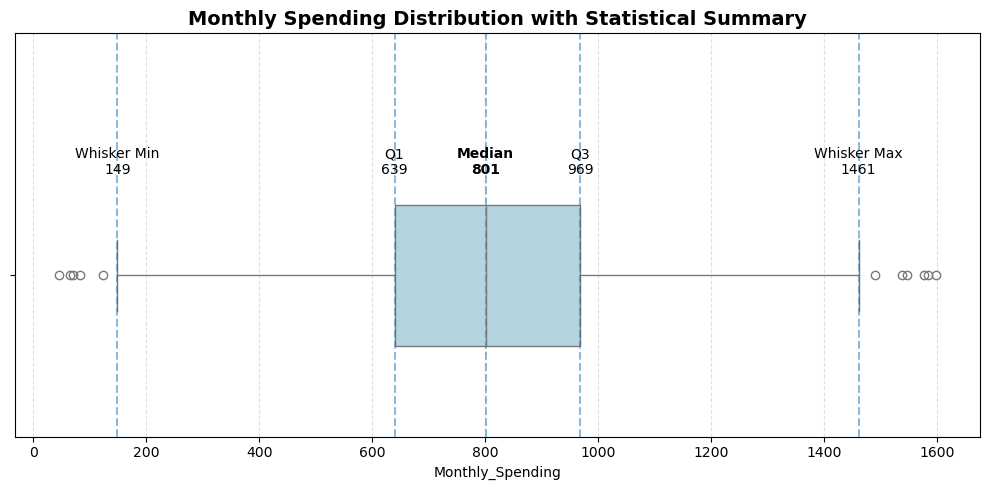

In [72]:
spending = data["Monthly_Spending"]
q1 = np.percentile(spending, 25)
median = np.median(spending)
q3 = np.percentile(spending, 75)
iqr = q3 - q1
lower_whisker = spending[spending >= q1 - 1.5 * iqr].min()
upper_whisker = spending[spending <= q3 + 1.5 * iqr].max()

plt.figure(figsize=(10,5))

sns.boxplot(x=spending, color="lightblue", width=0.35)

plt.title("Monthly Spending Distribution with Statistical Summary",
          fontsize=14, fontweight='bold')
for value in [lower_whisker, q1, median, q3, upper_whisker]:
    plt.axvline(value, linestyle='--', alpha=0.5)

y_pos = 0.25

plt.text(lower_whisker, y_pos, f"Whisker Min\n{lower_whisker:.0f}", ha='center')
plt.text(q1, y_pos, f"Q1\n{q1:.0f}", ha='center')
plt.text(median, y_pos, f"Median\n{median:.0f}", ha='center', fontweight='bold')
plt.text(q3, y_pos, f"Q3\n{q3:.0f}", ha='center')
plt.text(upper_whisker, y_pos, f"Whisker Max\n{upper_whisker:.0f}", ha='center')

plt.ylim(-0.4, 0.6)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


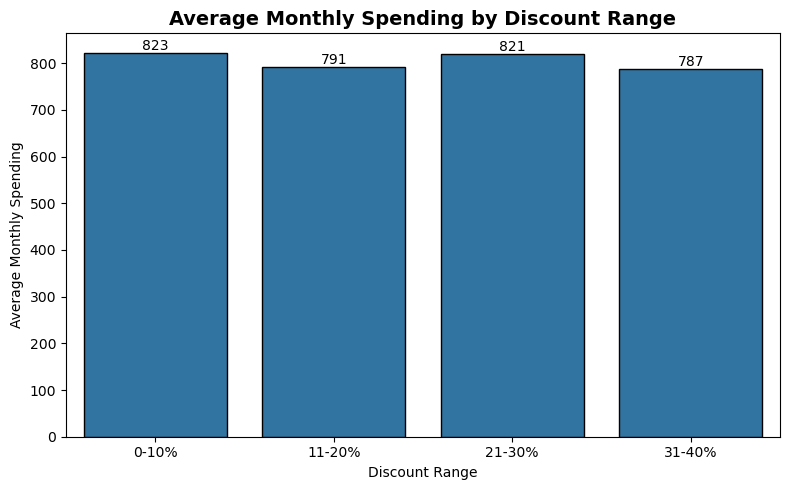

In [96]:
#Categorical Analysis

# ---- Create Discount Groups ----
bins = [0, 10, 20, 30, 40]
labels = ["0-10%", "11-20%", "21-30%", "31-40%"]

data["Discount_Group"] = pd.cut(
    data["Discount_Percentage"],
    bins=bins,
    labels=labels
    
)

# ---- Calculate Average Spending per Group ----
grouped = data.groupby("Discount_Group",observed=True)["Monthly_Spending"].mean().reset_index()

plt.figure(figsize=(8,5))

ax = sns.barplot(
    x="Discount_Group",
    y="Monthly_Spending",
    data=grouped,
    edgecolor="black"
)

# ---- Add Data Labels ----
for i in range(len(grouped)):
    ax.text(
        i,
        grouped["Monthly_Spending"][i],
        f'{grouped["Monthly_Spending"][i]:.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Average Monthly Spending by Discount Range",
          fontsize=14,
          fontweight='bold')

plt.xlabel("Discount Range")
plt.ylabel("Average Monthly Spending")

plt.tight_layout()
plt.show()


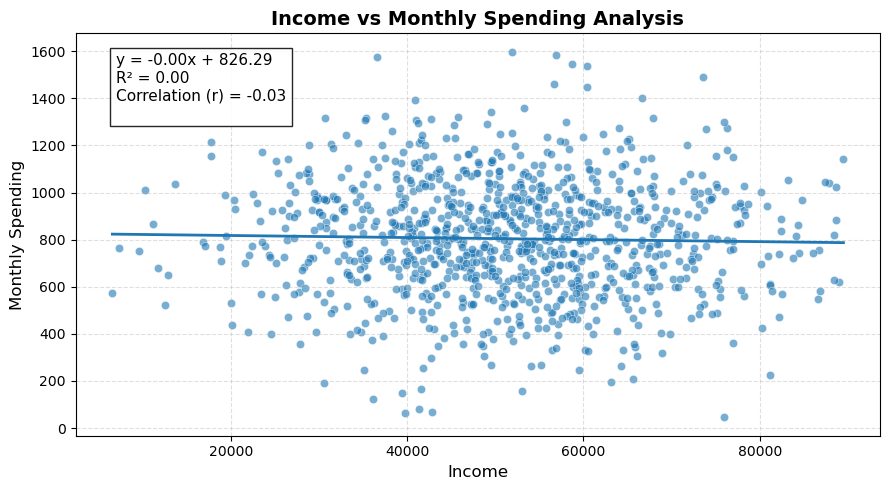

In [110]:
#Relationship Analysis


# Variables
x = data["Income"]
y = data["Monthly_Spending"]

# Regression calculation
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept

# Correlation and R²
correlation = np.corrcoef(x, y)[0,1]
r_squared = correlation**2

plt.figure(figsize=(9,5))

# Scatter
sns.scatterplot(x=x, y=y, alpha=0.6)

# Trend line (sorted for clean line)
sorted_idx = np.argsort(x)
plt.plot(x.iloc[sorted_idx],
         y_pred.iloc[sorted_idx],
         linewidth=2)

plt.title("Income vs Monthly Spending Analysis",
          fontsize=14, fontweight='bold')

plt.xlabel("Income", fontsize=12)
plt.ylabel("Monthly Spending", fontsize=12)

# Add equation + correlation + R²
plt.text(
    0.05, 0.95,
    f"y = {slope:.2f}x + {intercept:.2f}\n"
    f"R² = {r_squared:.2f}\n"
    f"Correlation (r) = {correlation:.2f}\n",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.85)
)

plt.grid(linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


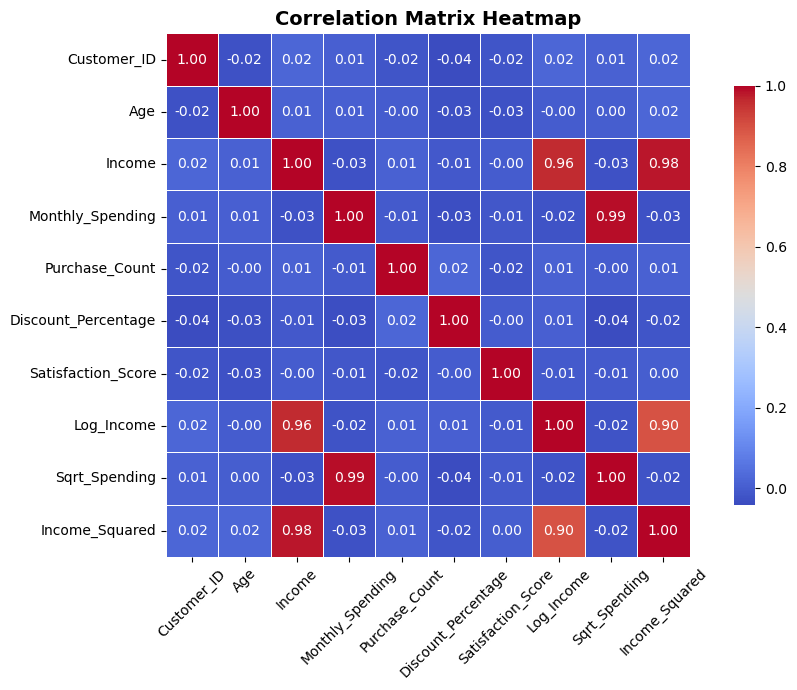

In [112]:
#Correlation Heatmap

corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10,7))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",              # show only 2 decimals
    cmap="coolwarm",
    linewidths=0.5,         # spacing between cells
    square=True,            # square cells
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix Heatmap",
          fontsize=14,
          fontweight='bold')

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


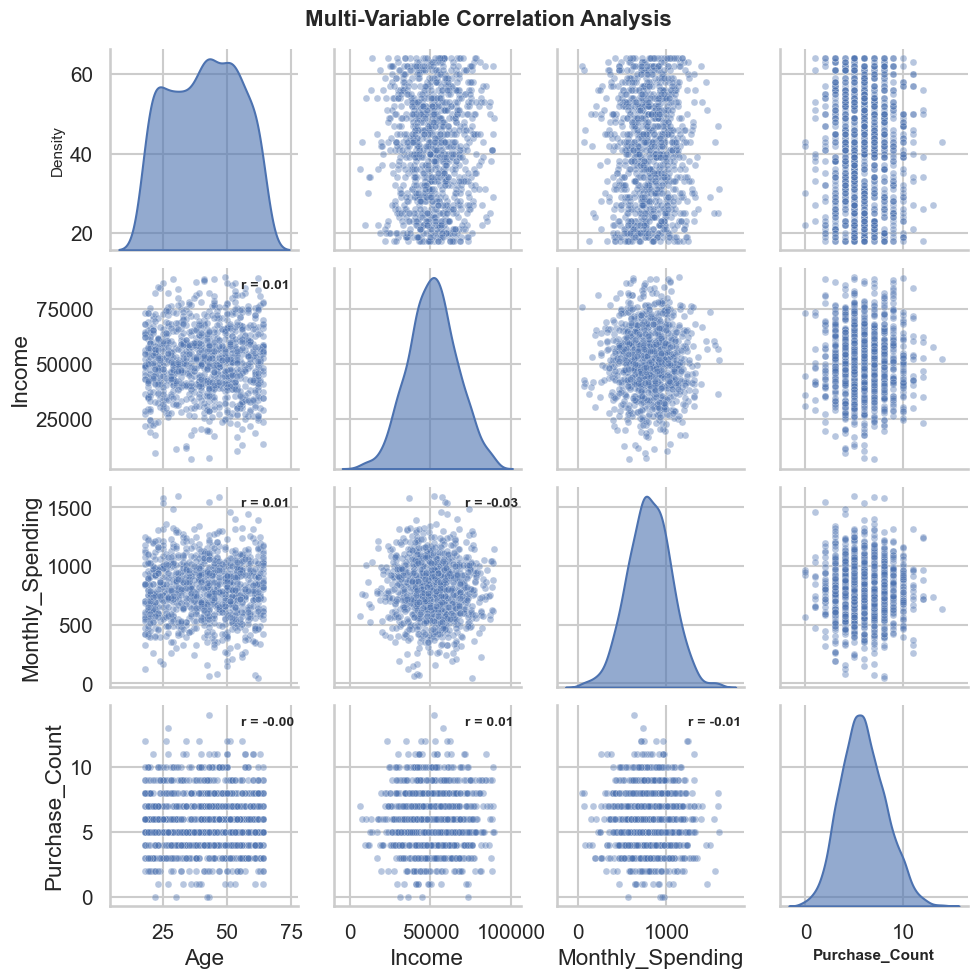

In [142]:
#Multi-Variable Visualization (Advanced)

def corr_annotation(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(
        f"r = {r:.2f}",
        xy=(0.7, 0.9),
        xycoords=ax.transAxes,
        fontsize=10,
        fontweight="bold"
    )

cols = ['Age', 'Income', 'Monthly_Spending', 'Purchase_Count']

pair = sns.pairplot(
    data=data[cols],          # ✅ DataFrame passed
    diag_kind="kde",
    plot_kws={"alpha": 0.4, "s": 25},
    diag_kws={"fill": True, "alpha": 0.6}
)

pair.map_lower(corr_annotation)

# Label diagonal KDE plots
for i, col in enumerate(cols):
    ax = pair.axes[i, i]
    if ax is not None:
        ax.set_xlabel(col, fontsize=11, fontweight="bold")
        ax.set_ylabel("Density", fontsize=11)

pair.fig.suptitle(
    "Multi-Variable Correlation Analysis",
    fontsize=16,
    fontweight="bold"
)

pair.fig.subplots_adjust(top=0.94)
plt.show()



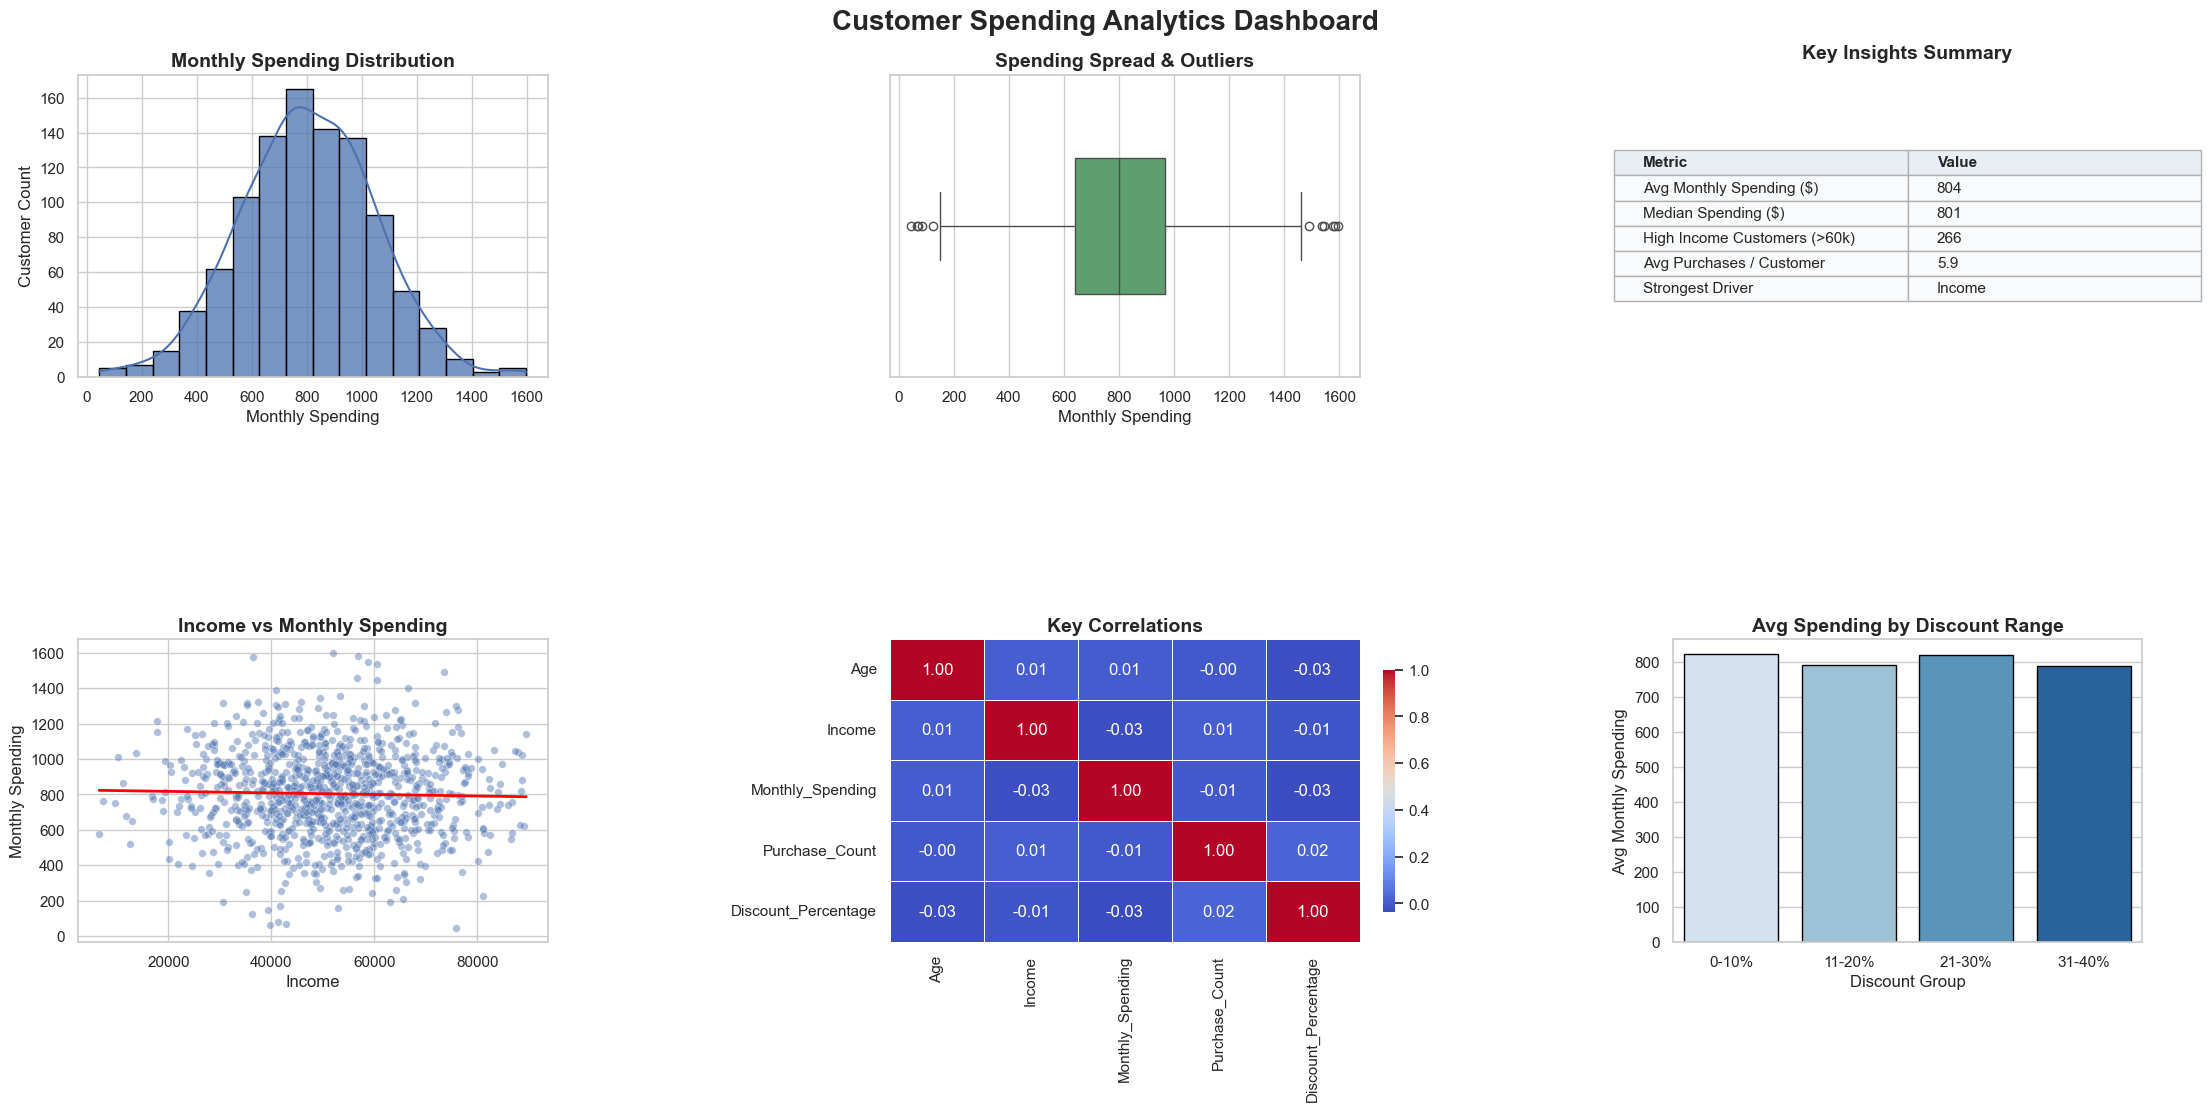

In [162]:

from matplotlib.gridspec import GridSpec


# ------------------------------
# Dashboard Layout
# ------------------------------
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(22, 11), constrained_layout=True)
gs = GridSpec(2, 3, figure=fig, wspace=0.25, hspace=0.35)

fig.suptitle(
    "Customer Spending Analytics Dashboard",
    fontsize=20,
    fontweight="bold"
)

# ------------------------------
# 1. Histogram
# ------------------------------
ax1 = fig.add_subplot(gs[0, 0])

sns.histplot(
    data["Monthly_Spending"],
    bins=16,
    kde=True,
    edgecolor="black",
    alpha=0.75,
    ax=ax1
)

ax1.set_title("Monthly Spending Distribution", fontsize=14, fontweight="bold")
ax1.set_xlabel("Monthly Spending")
ax1.set_ylabel("Customer Count")

# ------------------------------
# 2. Boxplot
# ------------------------------
ax2 = fig.add_subplot(gs[0, 1])

sns.boxplot(
    x=data["Monthly_Spending"],
    width=0.45,
    color="#55A868",
    ax=ax2
)

ax2.set_title("Spending Spread & Outliers", fontsize=14, fontweight="bold")
ax2.set_xlabel("Monthly Spending")
ax2.set_yticks([])

# ------------------------------
# 3. KPI TABLE (FIRST ROW)
# ------------------------------
ax3 = fig.add_subplot(gs[0, 2])
ax3.axis("off")

kpi_data = [
    ["Avg Monthly Spending ($)", f"{data['Monthly_Spending'].mean():,.0f}"],
    ["Median Spending ($)", f"{data['Monthly_Spending'].median():,.0f}"],
    ["High Income Customers (>60k)", f"{(data['Income'] > 60000).sum()}"],
    ["Avg Purchases / Customer", f"{data['Purchase_Count'].mean():.1f}"],
    ["Strongest Driver", "Income"]
]

table = ax3.table(
    cellText=kpi_data,
    colLabels=["Metric", "Value"],
    loc="center",
    cellLoc="left",
    colLoc="left"
)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.25, 1.8)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_facecolor("#E8EEF4")
        cell.set_text_props(fontweight="bold")
    else:
        cell.set_facecolor("#F8FAFC")
    cell.set_edgecolor("#B0B0B0")

ax3.set_title("Key Insights Summary", fontsize=14, fontweight="bold", pad=12)

# ------------------------------
# 4. Scatter + Regression
# ------------------------------
ax4 = fig.add_subplot(gs[1, 0])

x = data["Income"]
y = data["Monthly_Spending"]

sns.scatterplot(x=x, y=y, alpha=0.45, s=30, ax=ax4)

slope, intercept = np.polyfit(x, y, 1)
sorted_idx = np.argsort(x)

ax4.plot(
    x.iloc[sorted_idx],
    slope * x.iloc[sorted_idx] + intercept,
    color="red",
    linewidth=2
)

ax4.set_title("Income vs Monthly Spending", fontsize=14, fontweight="bold")
ax4.set_xlabel("Income")
ax4.set_ylabel("Monthly Spending")

# ------------------------------
# 5. Correlation Heatmap (Clean)
# ------------------------------
ax5 = fig.add_subplot(gs[1, 1])

heatmap_vars = [
    "Age",
    "Income",
    "Monthly_Spending",
    "Purchase_Count",
    "Discount_Percentage"
]

corr = data[heatmap_vars].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    ax=ax5
)

ax5.set_title("Key Correlations", fontsize=14, fontweight="bold")

# ------------------------------
# 6. Bar Chart
# ------------------------------
ax6 = fig.add_subplot(gs[1, 2])

grouped = data.groupby("Discount_Group", observed=True)["Monthly_Spending"].mean()

sns.barplot(
    x=grouped.index,
    y=grouped.values,
    edgecolor="black",
    hue=grouped.index,
    palette="Blues",
    legend=False,
    ax=ax6
)

ax6.set_title("Avg Spending by Discount Range", fontsize=14, fontweight="bold")
ax6.set_xlabel("Discount Group")
ax6.set_ylabel("Avg Monthly Spending")

# ------------------------------
# Final Layout
# ------------------------------

plt.show()
